## Source: Climate Change: Earth Surface Temperature Data
https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data/

Data from 1743 - 2013

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
!ls ../data

 GlobalLandTemperaturesByCountry.csv   GlobalTemperatures.csv  'NFA 2018.csv'


In [3]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

global_temp_country = pd.read_csv('../data/GlobalLandTemperaturesByCountry.csv')

In [4]:
# Line count:
len(global_temp_country)

577462

In [5]:
# Columns
list(global_temp_country)

['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country']

In [6]:
global_temp_country.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [7]:
global_temp_country.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [8]:
t = global_temp_country[global_temp_country.isna().any(axis=1)]
len(t)

32651

In [9]:
times = pd.unique(global_temp_country['dt'])
times[:20]

array(['1743-11-01', '1743-12-01', '1744-01-01', '1744-02-01',
       '1744-03-01', '1744-04-01', '1744-05-01', '1744-06-01',
       '1744-07-01', '1744-08-01', '1744-09-01', '1744-10-01',
       '1744-11-01', '1744-12-01', '1745-01-01', '1745-02-01',
       '1745-03-01', '1745-04-01', '1745-05-01', '1745-06-01'],
      dtype=object)

## ETL

In [10]:
#Let's remove the duplicated countries (in the analysis, we don't consider the presence of 
#colonies at this the countries) and countries for which no information about the temperature

global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

In [11]:
global_temp_country_nonans = global_temp_country_clear.dropna()
len(global_temp_country_nonans)

526013

In [12]:
global_temp_country_nonans['year'] = global_temp_country_nonans['dt'].str[:4]
global_temp_country_nonans_with_year = global_temp_country_nonans.astype({'year': 'int32'})
np.unique(global_temp_country_nonans_with_year['year'])

array([1743, 1744, 1745, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757,
       1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768,
       1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779,
       1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790,
       1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801,
       1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812,
       1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823,
       1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834,
       1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845,
       1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856,
       1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867,
       1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878,
       1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
       1890, 1891, 1892, 1893, 1894, 1895, 1896, 18

In [13]:
surface_temp_by_year_and_country = global_temp_country_nonans_with_year.groupby(['year', 'Country'], as_index=False).agg({'AverageTemperature': 'mean', 'AverageTemperatureUncertainty': 'mean'})

In [14]:
len(surface_temp_by_year_and_country)

44334

In [15]:
list(surface_temp_by_year_and_country)

['year', 'Country', 'AverageTemperature', 'AverageTemperatureUncertainty']

In [16]:
year_data = surface_temp_by_year_and_country[surface_temp_by_year_and_country['year'] == 1850]
year_data

,year,Country,AverageTemperature,AverageTemperatureUncertainty
7541,1850,Afghanistan,13.326083,1.961917
7542,1850,Albania,11.734667,1.427667
7543,1850,Algeria,22.587333,1.707583
7544,1850,Andorra,10.651750,1.386083
7545,1850,Anguilla,26.106333,1.130833
7546,1850,Antigua And Barbuda,25.933250,1.122083
7547,1850,Armenia,7.793167,1.702167
7548,1850,Aruba,27.438167,1.197167
7549,1850,Asia,6.586750,0.965250
7550,1850,Austria,5.536667,1.465667


In [17]:
len(year_data)

179

## Graphics

source https://www.kaggle.com/amelinvladislav/map-of-temperatures-and-analysis-of-global-warming

#Let's remove the duplicated countries (in the analysis, we don't consider the presence of 
#colonies at this the countries) and countries for which no information about the temperature

In [18]:
#Let's average temperature for each country


In [19]:
def plot_world_map_with_data(countries, data, year):

    data = [ dict(
            type = 'choropleth',
            locations = countries,
            z = data,
            locationmode = 'country names',
            text = countries,
            marker = dict(
                line = dict(color = 'rgb(0,0,0)', width = 1)),
                colorbar = dict(autotick = True, tickprefix = '', 
                title = '# Average\nTemperature,\n°C')
                )
           ]

    layout = dict(
        title = 'Average land temperature in countries ' + str(year),
        geo = dict(
            showframe = False,
            showocean = True,
            oceancolor = 'rgb(0,255,255)',
            projection = dict(
            type = 'orthographic',
                rotation = dict(
                        lon = 60,
                        lat = 10),
            ),
            lonaxis =  dict(
                    showgrid = True,
                    gridcolor = 'rgb(102, 102, 102)'
                ),
            lataxis = dict(
                    showgrid = True,
                    gridcolor = 'rgb(102, 102, 102)'
                    )
                ),
            )

    fig = dict(data=data, layout=layout)
    py.iplot(fig, validate=False, filename='worldmap')
    


def filter_and_plot(data, year):
    year_data = data[data['year'] == year]
    countries = np.unique(year_data['Country'])
    mean_temp = year_data['AverageTemperature'] 
    plot_world_map_with_data(countries, mean_temp, year)

    
filter_and_plot(surface_temp_by_year_and_country, 1743)

In [20]:
int_range = widgets.IntSlider(
    value=0,
    min=0,
    max=270,
    step=30,
)
output2 = widgets.Output()

display(int_range, output2)

def on_value_change(change):
    with output2:
        clear_output(wait=True)
        filter_and_plot(surface_temp_by_year_and_country, 1743+change['new'])

int_range.observe(on_value_change, names='value')

IntSlider(value=0, max=270, step=30)

Output()

In [21]:
play = widgets.Play(
    interval=2000,
    value=0,
    min=0,
    max=100,
    step=10,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])
output = widgets.Output()


display(play, output)

def on_value_change(change):
    with output:
        print(change['new'])
        clear_output(wait=True)
        filter_and_plot(surface_temp_by_year_and_country, 1913+change['new'])

play.observe(on_value_change, names='value')

Play(value=0, description='Press play', interval=2000, step=10)

Output()

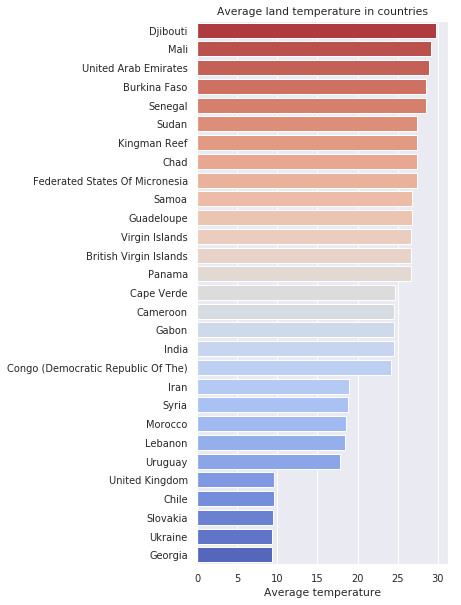

In [22]:
def plot_vertical_bar_chart(data, year):
    year_data = data[data['year'] == year]
    countries = np.unique(year_data['Country'])
    mean_temp = year_data['AverageTemperature']
    
    mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), 
                                                                 reverse = True)))
    
    property_a = mean_temp_bar
    property_b = countries_bar
    good_indices = [0, 1, 2, 3, 4, 20, 21, 22, 23, 50, 51, 52, 53, 54, 100, 101, 102, 103, 104, 150, 151, 152, 153, 154, 200, 201, 202, 203, 204]
    property_asel = [property_a[i] for i in good_indices]
    property_bsel = [property_b[i] for i in good_indices]
    
    mean_temp_bar = property_asel
    countries_bar = property_bsel
    
    sns.set(font_scale=0.9) 
    f, ax = plt.subplots(figsize=(4.5, 10))
    colors_cw = sns.color_palette('coolwarm', len(countries_bar))
    sns.barplot(mean_temp_bar, countries_bar, palette = colors_cw[::-1])
    Text = ax.set(xlabel='Average temperature', title='Average land temperature in countries')
    
plot_vertical_bar_chart(surface_temp_by_year_and_country, 2000)

In [59]:
int_range = widgets.IntSlider(
    value=0,
    min=0,
    max=270,
    step=30,
)
output2 = widgets.Output()

display(int_range, output2)

def on_value_change(change):
    with output2:
        clear_output()
        plot_vertical_bar_chart(surface_temp_by_year_and_country, 1913+change['new'])

int_range.observe(on_value_change, names='value')

IntSlider(value=0, max=270, step=30)

Output()

In [58]:
global_temp = pd.read_csv("../data/GlobalTemperatures.csv")

#Extract the year from a date
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp[global_temp['dt'].apply(
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)